# A Pricing Analysis of Airbnb Listings

## Lab 8: Define and Solve an ML Problem of My Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter
import ast

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV

## The Objective
The objective of this pricing analysis is to predict Airbnb listing prices by exploring various features to build an effective predictive model.
* **Dataset Chosen**: I’m working with New York City’s Airbnb Listings Data. I picked this dataset because it’s creative and diverse, offering unique challenges like logistic regression and clustering. It’s real-world data that provides valuable insights into both society and real estate.
* **Prediction and Label**: The goal is to predict the price of Airbnb listings, with the ```price``` variable being the label representing the cost of each listing.
* **Type of Learning Problem**: This is a supervised learning problem. I used three different models—linear regression, random forests, and gradient boosting—to predict the continuous variable, price. The process also involved fun data preprocessing tasks, such as using natural language processing, transforming numerical values, and encoding categorical data.
* **Features**: 'NYC 
    * ```beds```
    * ```bedrooms```
    * ```accommodates```
    * ```bathrooms```
    * ```total_rooms```
    * ```price```
    * ```amenities```
    * ```neighbourhood_group_cleansed```
    * ```room_type```
* **Importance of the Problem**: Accurate price predictions are helpful for hosts, guests, and Airbnb itself. Hosts can set competitive prices to maximize their revenue while attracting guests. Guests can find accommodations that offer great value based on their preferences. For Airbnb, predictive pricing models can optimize strategies, boost user satisfaction, and improve overall platform efficiency.

## Plan for Implementing the Remaining Phases of the Machine Learning Life Cycle
1. **Feature List**: After inspecting the data, my feature list will be refined to include features that are most relevant to predicting Airbnb listing prices. The chosen features are:
    * beds
    * bedrooms
    * accommodates
    * bathrooms
    * total_rooms
    * amenities
    * neighbourhood_group_cleansed
    * room_type

2. **Data Preparation Techniques**: To prepare the data for modeling, I will use the following techniques:
    * Handling Missing Values: Removing missing values.
    * Feature Scaling: Normalizing numerical features to ensure that they are on a similar scale.
    * Encoding Categorical Variables: Converting categorical variables into numerical form using one-hot encoding for features neighbourhood_group_cleansed and room_type.
    * Feature Engineering: Create new features like total_rooms.
    * Splitting Data: Divide the dataset into training and testing subsets to evaluate the model's performance on unseen data.

3. Model(s):
    * Linear Regression: A simple model to understand the linear relationships between features and price.
    * Random Forest: A more complex model that can capture non-linear relationships and interactions between features.
    * Gradient Boosting: An advanced ensemble method that builds on the strengths of other models to improve predictive performance.
      
4. Model Building, Validation, and Selection:
    * Training the Model: Train each model using the training dataset. Ensure that the models are properly tuned with grid search.
    * Validation: Use k-fold cross-validation, to assess the model’s performance on different subsets of the training data.
    * Evaluation Metrics: Evaluate the model performance using Mean Squared Error (MSE), and R-squared to determine how well the models predict the listing prices.
    * Improving the Model: Based on evaluation results, refine the models by adjusting hyperparameters, selecting different features, and trying additional preprocessing techniques. 
    * Testing and Selection: Finally, test the best-performing model(s) on the test dataset to ensure that it generalizes well to new, unseen data.


### Exploratory Data Analysis
**Using Exploratory Data Analysis, I'm discovering patterns in numerical data, then moving on to categorical data!**


I chose to use the Airbnb NYC "listings" data set: `airbnbListingsData.csv`

In [2]:
# Constructing the file path to the CSV file that contains the listings data for Airbnb in NYC
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")

# Load the dataframe
# Reading the CSV file into a pandas DataFrame for analysis
df = pd.read_csv(airbnbDataSet_filename)

**Let’s take a look at the data.**  

Before we start analyzing or building our model, it’s important to understand what the data looks like. By checking out the dataset, we can see the different features available and notice any patterns or issues we might need to fix.

In [3]:
df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


Viewing this dataset raises several questions for me:

* Do different types of listings—entire homes, private rooms, and shared rooms—really have varying prices?
* Are properties in popular neighborhood groups likely to have higher prices? 
* How much do the amenities offered influence pricing? Do listings with features like gyms, pools, or Wi-Fi tend to be priced higher than those without?

Using ```.info()``` also gives us valuable insights about the dataset.  It shows the number of entries, the count of non-null values for each column, and the data types, helping us understand the data's quality and identify missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          28017 non-null  object 
 1   description                                   27452 non-null  object 
 2   neighborhood_overview                         18206 non-null  object 
 3   host_name                                     28022 non-null  object 
 4   host_location                                 27962 non-null  object 
 5   host_about                                    17077 non-null  object 
 6   host_response_rate                            16179 non-null  float64
 7   host_acceptance_rate                          16909 non-null  float64
 8   host_is_superhost                             28022 non-null  bool   
 9   host_listings_count                           28022 non-null 

When I look at this output, a few thoughts come to mind. It’s clear there’s **potential for preprocessing** the data. There are also several columns with null values. We'll need to think about how to **handle these missing values** throughout our analysis. This could involve filling them in, dropping those entries, or analyzing how they might impact our results.

Since my goal is to predict pricing, I'm interested in uncovering any obvious correlations between the features and the 'pricing'. To help visualize this, I created a **heatmap** that displays the correlation between different variables.

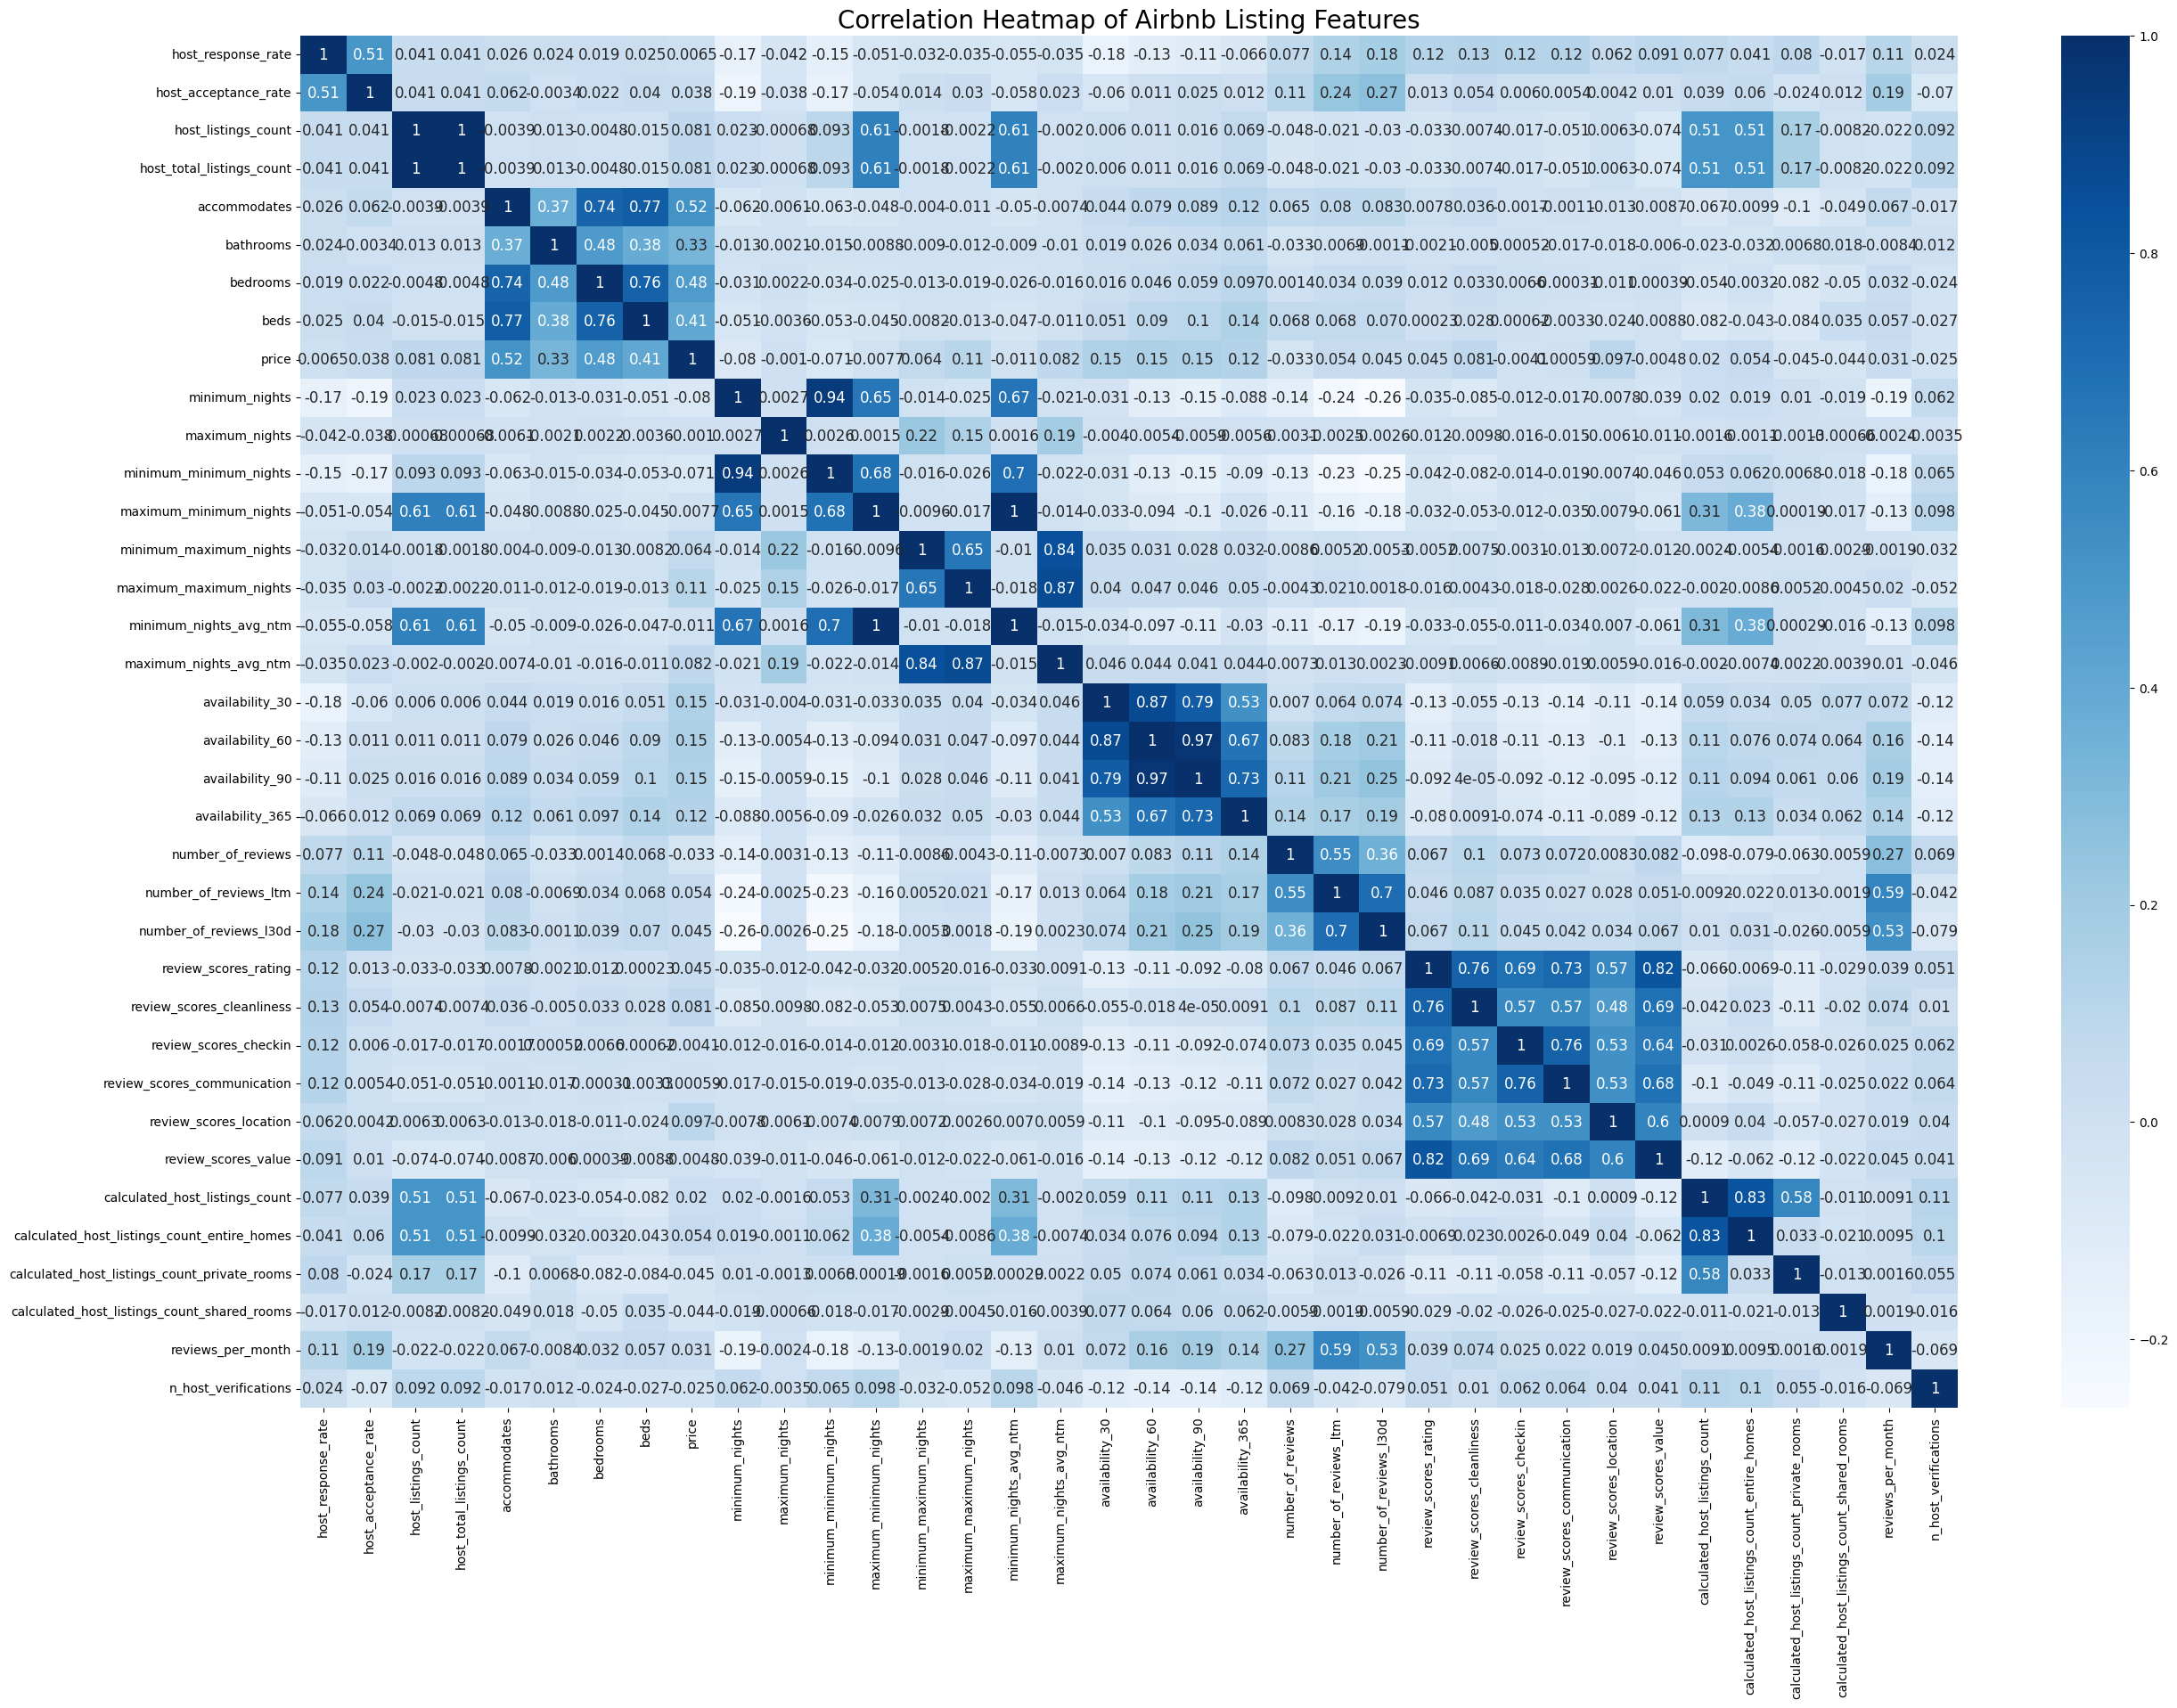

In [5]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Set the figure size to make the heatmap larger for better readability
plt.figure(figsize=(30, 20))

sns.heatmap(numeric_df.corr(), # computes pairwise correlation of columns
            annot = True, # displays correlation values on heatmap
            cmap = "Blues", # usesblue color palette for heatmap
            annot_kws={"size": 12}) # sets the font size

# Adding a title to the heatmap for clarity
plt.title("Correlation Heatmap of Airbnb Listing Features", fontsize=20)

# Displaying the heatmap
plt.show()

From this heatmap, I've decided to use these features:
* ```'beds'```: With a correlation of **0.41**, this value is slightly positive, indicating that more beds are generally associated with higher prices. This suggests that listings with additional beds are associated with higher rental rates.
* ```'bedroooms'```: The correlation is **0.48**, which indicates a moderately positive relationship, suggesting more are associated with higher prices.
* ```'bathrooms'```: This feature has a correlation of **0.33**, showing a relatively weaker positive correlation. This suggests that more bathrooms can influence a higher price.
* ```'accomodates'```: With a correlation of **0.52**, this reflects a strong positive association. This suggests that the number of guests a property can accommodate is a key factor in determining its price.


I also decided to create a new feature called ```total_rooms```, which combines the number of bedrooms and bathrooms. This feature provides a comprehensive view of the property’s size and helps to represent the available space for guests more effectively.

In [6]:
# sums the number of 'bedrooms' and 'bathrooms'
df['total_rooms'] = df['bedrooms'] + df['bathrooms']

# view the first 5 listing's total number of rooms
df['total_rooms'].head(5)

0    NaN
1    2.0
2    3.5
3    2.0
4    2.0
Name: total_rooms, dtype: float64

The selected features are ```'beds'```, ```'bedrooms'```, ```'accommodates'```, ```'bathrooms'```, and the newly created ```'total_rooms'```, along with the target variable ```'price'```. These data columns will be put in a new dataframe called ```data```.

In [7]:
features = ["beds", "bedrooms", "accommodates", "bathrooms", "total_rooms", "price"]

# Creating a new DataFrame that only includes the columns specified in the features list
data = df[features]

Now, I’ll create histograms for each feature to understand their distributions and assess any skewness. By examining the histograms, I can explore the relationships between these features and the target variable, price. 

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

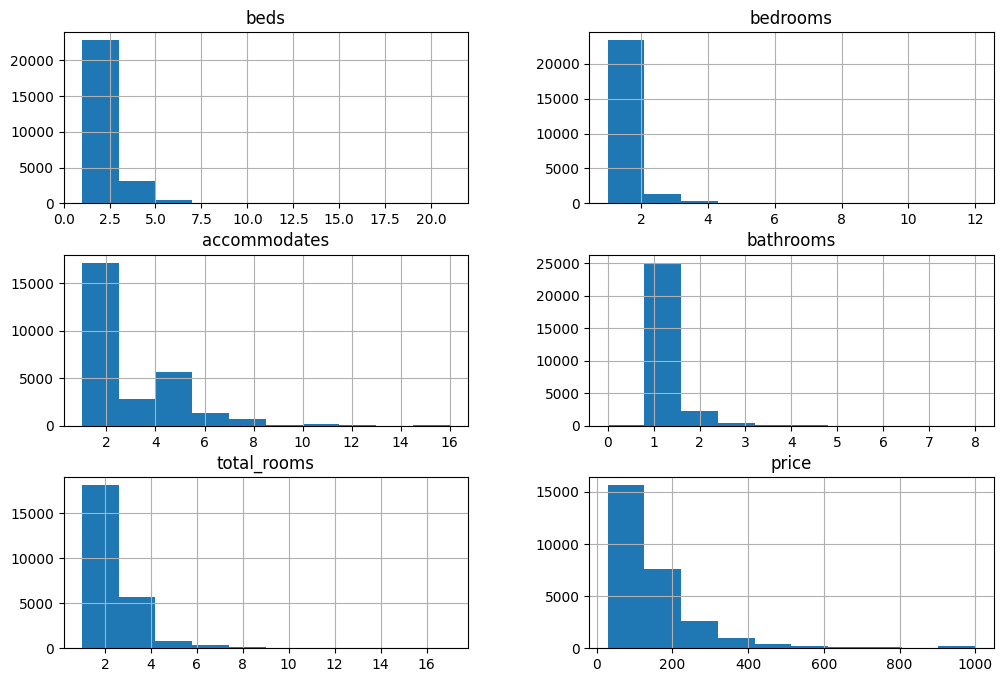

In [8]:
data.hist(figsize = (12, 8))

**Skewness**!
The histograms show most features are right-skewed, meaning there are many low values and a few high ones. 

*What this means*: Right-skewed data can distort predictions since many methods assume normal distribution. I'll being using a logarithmic transformation to normalize the data and enhance model performance.

**Outliers**!
Notice some outliers in the data—values that are significantly higher than the rest. They are few in number but very noticeable.

*What this means*: Outliers can distort our results, making averages and correlations misleading. To tackle this, I decided to create upper bounds for each feature to effectively filter out these outliers.

* ```'beds'```: Using the interquartile range (IQR) method, I calculated the upper bound for the number of beds.
* ```'accommodates'```: Similarly, I applied the IQR method to the number of people a listing can accommodate.
* ```'bedrooms'```: For bedrooms, I found that Q1 (1) and Q3 (1) were the same, which meant IQR wasn’t applicable. So, I calculated the 90th to 99th percentiles and set the upper bound at 4 based on the 99th percentile.
* ```'bathrooms'```: Same method as ```bedrooms```.
* ```'total_rooms'```: I used the IQR method again.




In [9]:
# Creating a copy of data to avoid modifying the original dataset during processing
data = data.copy()

# Remove any rows with null values to ensure that we're working with complete data
data.dropna(inplace = True)

In [10]:
# Determine the upper bound for the number of beds
df['beds'].describe()
bed_upper_bound = 2 + (1.5 * (2 - 1))

# Determine the upper bound for the number of people accommodated for
df['accommodates'].describe()
acc_upper_bound = 4 + (1.5 * (4 - 2)) 

# Determine the upper bound for the number of bedrooms
percentiles = df['bedrooms'].quantile([0.90, 0.95, 0.99])
print("Highest Percentiles for # of Bedrooms") 
print(percentiles)
bedrooms_upper_bound = 4

# Determine the upper bound for the number of bathrooms
df['bathrooms'].describe()
percentiles = df['bathrooms'].quantile([0.90, 0.95, 0.99])
print("\nHighest Percentiles for # of Bathrooms") 
print(percentiles)
bathrooms_upper_bound = 3

# Determine the upper bound for the number of total rooms
df['total_rooms'].describe()
total_rooms_upper_bound = 3 + (1.5 * (3 - 2))

Highest Percentiles for # of Bedrooms
0.90    2.0
0.95    3.0
0.99    4.0
Name: bedrooms, dtype: float64

Highest Percentiles for # of Bathrooms
0.90    2.0
0.95    2.0
0.99    3.0
Name: bathrooms, dtype: float64


*Before we use the upper bounds to address our outliers, let’s take a look at the statistics below, especially the maximum values and the standard deviation.*

In [11]:
data.describe()

,beds,bedrooms,accommodates,bathrooms,total_rooms,price
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,1.663792,1.336750,2.944708,1.158396,2.495146,154.120292
std,1.135771,0.706779,1.911580,0.441697,0.998252,143.729601
min,1.000000,1.000000,1.000000,0.000000,1.000000,29.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,70.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,111.000000
75%,2.000000,1.000000,4.000000,1.000000,3.000000,182.000000
max,21.000000,12.000000,16.000000,8.000000,17.000000,1000.000000


I created ```apply_upper_bound``` to cap outliers in the dataset by replacing any values that exceed specified upper bounds for the features, with those upper bounds.

In [12]:
def apply_upper_bound(df, column, upper_bound):
    df.loc[df[column] > upper_bound, column] = upper_bound

apply_upper_bound(data, 'beds', bed_upper_bound)
apply_upper_bound(data, 'accommodates', acc_upper_bound)
apply_upper_bound(data, 'bedrooms', bedrooms_upper_bound)
apply_upper_bound(data, 'bathrooms', bathrooms_upper_bound)
apply_upper_bound(data, 'total_rooms', total_rooms_upper_bound)

data.describe()

,beds,bedrooms,accommodates,bathrooms,total_rooms,price
count,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000
mean,1.573458,1.328792,2.858750,1.152167,2.431417,154.120292
std,0.821487,0.660963,1.593002,0.401064,0.742747,143.729601
min,1.000000,1.000000,1.000000,0.000000,1.000000,29.000000
25%,1.000000,1.000000,2.000000,1.000000,2.000000,70.000000
50%,1.000000,1.000000,2.000000,1.000000,2.000000,111.000000
75%,2.000000,1.000000,4.000000,1.000000,3.000000,182.000000
max,3.500000,4.000000,7.000000,3.000000,4.500000,1000.000000


Notice how the maximum values have changed! The standard deviation has also gone down as the data isn’t as stretched. Now that we’ve removed the null values and outliers, *let’s look at our histogram to see the updated data distribution!*

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

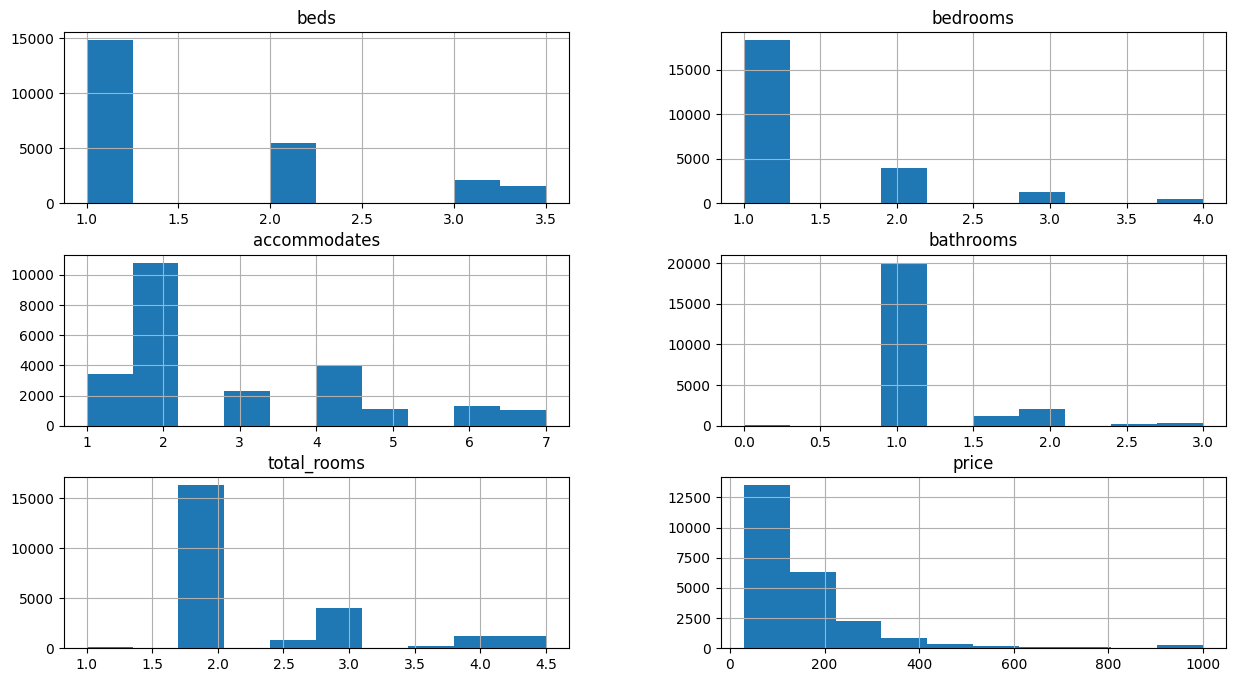

In [13]:
data.hist(figsize = (15, 8))

The features are right-skewed, which can make it difficult to predict the label accurately. Skewed data can lead to biased results, so we take the logarithm to normalize it. We add +1 to avoid taking the log of 0, which is undefined.

In larger projects, it’s useful to create a function for logging data, but since we only have six values, we can handle it manually. I also decided to log the price variable because it has a wide range and is right-skewed. Logging it will help improve our model’s accuracy :D

In [14]:
data['beds'] = np.log(data['beds'] + 1)
data['bedrooms'] = np.log(data['bedrooms'] + 1)
data['accommodates'] = np.log(data['accommodates'] + 1) 
data['bathrooms'] = np.log(data['bathrooms'] + 1)
data['total_rooms'] = np.log(data['total_rooms'] + 1)
data['price'] = np.log(data['price'] + 1)        

data

,beds,bedrooms,accommodates,bathrooms,total_rooms,price
1,1.386294,0.693147,1.386294,0.693147,1.098612,4.330733
2,1.098612,1.098612,1.609438,0.916291,1.504077,5.620401
3,0.693147,0.693147,1.098612,0.693147,1.098612,4.234107
4,0.693147,0.693147,0.693147,0.693147,1.098612,4.330733
7,0.693147,0.693147,0.693147,0.693147,1.098612,4.143135
...,...,...,...,...,...,...
28017,0.693147,0.693147,1.098612,0.693147,1.098612,4.499810
28018,1.098612,1.098612,1.945910,0.693147,1.386294,6.908755
28019,0.693147,0.693147,1.098612,1.098612,1.386294,4.174387
28020,1.098612,0.693147,1.386294,0.693147,1.098612,4.442651


*Do you notice the different numbers?* To get a better understanding of what just happened, let's view the histograms again!

*As you can see, the distribution looks much more normal now!*

array([[<Axes: title={'center': 'beds'}>,
        <Axes: title={'center': 'bedrooms'}>],
       [<Axes: title={'center': 'accommodates'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

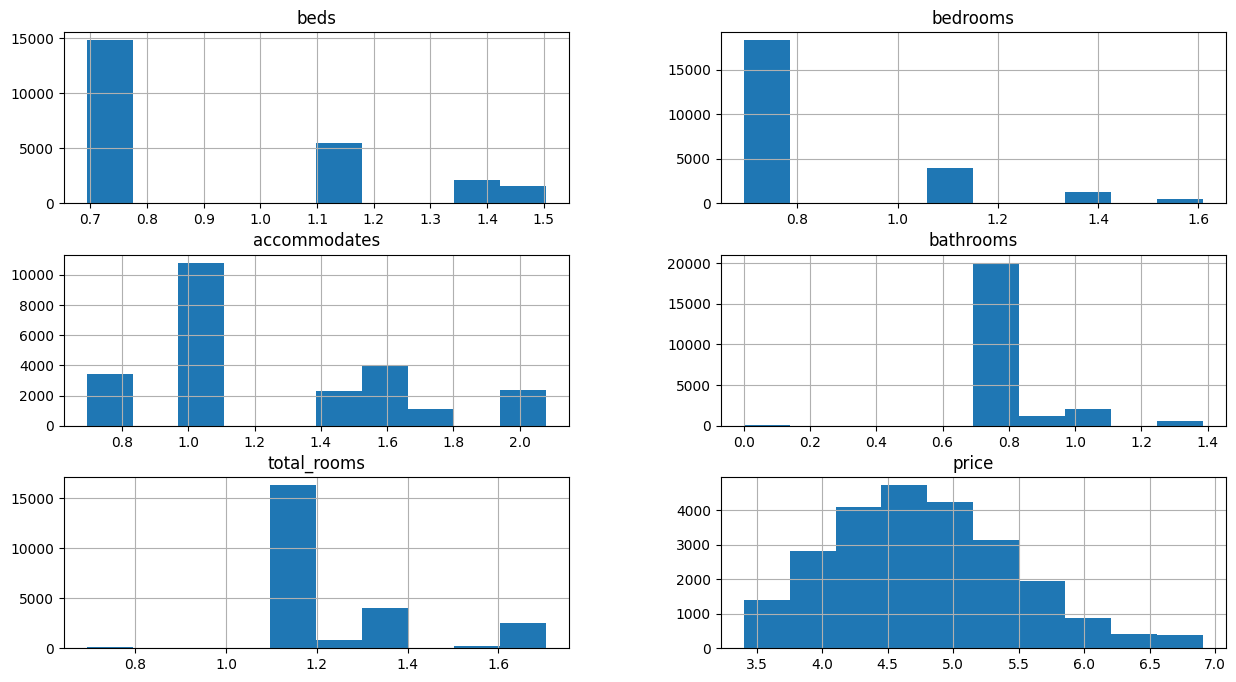

In [15]:
data.hist(figsize = (15, 8))

I looked at the heatmap after transforming the features because transformations, like logarithmic scaling, can change how the variables relate to each other. By checking the heatmap after these changes, I can see how the correlations have shifted and whether the features are now better suited for predicting the target label. This way, I ensure the model is using more normalized data.

Most of the features show similar strengths in their positive correlations, with some being slightly stronger. However, the correlation for the number of bathrooms is only **0.2**, which indicates a weaker relationship compared to the other features. This means that while having more bathrooms can impact the price, it matters less than features like beds, bedrooms, and accommodates.

<Axes: >

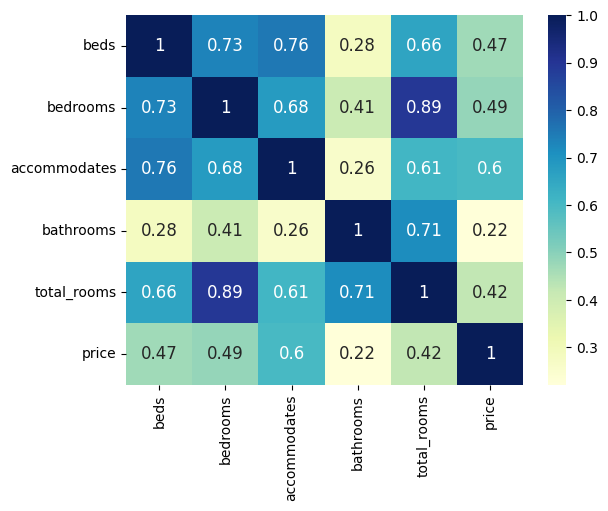

In [16]:
sns.heatmap(data.corr(), annot = True, cmap = "YlGnBu", annot_kws={"size": 12})

Now that we've thoroughly explored and refined our numerical features, it's time to shift our focus to the categorical features in our dataset! I'm curious about property types and location influencing price, so to start us off, let's learn more about the ```neighbourhood_group_cleansed```!

In [17]:
# Display the unique values in the 'neighbourhood_group_cleansed' column
df['neighbourhood_group_cleansed'].unique()

array(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

**Let's visualize the differences between the neighborhood groups!**

By creating boxplots that show the differences among the various neighborhood groups, we can understand how each group contributes to pricing. Visualizing can help us identify trends, patterns, and outliers, but we'll also using the ```.describe()``` method to see the exact statistics.

First, I'm loading the different subsets of data by neighbourhood_group.

In [18]:
man = df[df['neighbourhood_group_cleansed'] == 'Manhattan']
brook = df[df['neighbourhood_group_cleansed'] == 'Brooklyn']
queens = df[df['neighbourhood_group_cleansed'] == 'Queens']
staten = df[df['neighbourhood_group_cleansed'] == 'Staten Island']
bronx = df[df['neighbourhood_group_cleansed'] == 'Bronx']

Let's visualize the pricing across different neighborhoods to see if there are any notable differences between locations, which can help us understand how location impacts pricing.

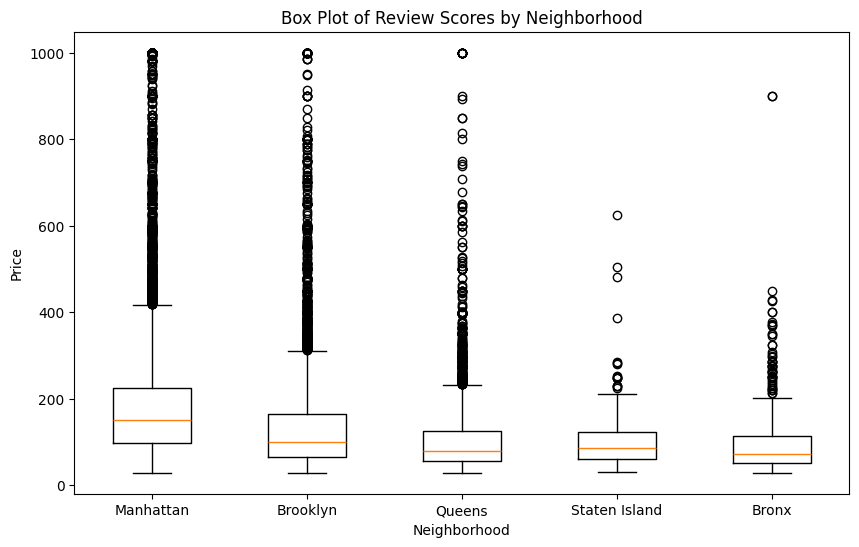

In [19]:
# Accessing the price column for each neighborhood group 
man_arr_box = man['price']
brook_arr_box = brook['price']
queens_arr_box = queens['price']
staten_arr_box = staten['price']
bronx_arr_box = bronx['price']

# Creating a list that contains the price data for each neighborhood for plotting
data_to_plot = [man_arr_box, brook_arr_box, queens_arr_box, staten_arr_box, bronx_arr_box]

# Creating boxplot incoming...
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.boxplot(data_to_plot)
ax.set_xticklabels(['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx'])
plt.title('Box Plot of Review Scores by Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()

I personally find it helpful to look at the differences in pricing through statistics as well. This deeper analysis helps confirm our observations and gives us a clearer understanding of the data we're exploring.

In [20]:
# Accessing the 'price' column's descriptive statistics
man_arr = man['price'].describe()
brook_arr = brook['price'].describe()
queens_arr = queens['price'].describe()
staten_arr = staten['price'].describe()
bronx_arr = bronx['price'].describe()

# Creating a dictionary to store the descriptive statistics for each neighborhood
neighborhood_data = {
    'Manhattan': man_arr,
    'Brooklyn': brook_arr,
    'Queens': queens_arr,
    'Staten Island': staten_arr,
    'Bronx': bronx_arr
}

# Converting the dictionary into a DataFrame for better readability
df_summary = pd.DataFrame(neighborhood_data)
df_summary

,Manhattan,Brooklyn,Queens,Staten Island,Bronx
count,11639.000000,11258.000000,4003.000000,284.000000,838.000000
mean,193.930578,134.988009,108.664751,102.767606,96.389021
std,166.528395,116.636417,98.815595,70.368155,76.483349
min,29.000000,29.000000,29.000000,31.000000,29.000000
25%,97.000000,65.000000,55.000000,60.000000,51.000000
50%,150.000000,100.000000,80.000000,87.000000,72.000000
75%,225.000000,164.000000,126.000000,122.000000,115.000000
max,1000.000000,1000.000000,1000.000000,625.000000,900.000000


**Price Ranges**:
* Manhattan: Highest median prices and widest interquartile range (IQR), indicating significant price variability and many outliers, with prices reaching up to $1000.
* Brooklyn: Lower median prices compared to Manhattan, but still has a notable number of high-priced listings and outliers.
* Queens: Similar median price and IQR to Brooklyn, but with fewer high-priced outliers.
* Staten Island: Lower median prices with a more compact IQR and fewer outliers compared to other neighborhoods.
* Bronx: Lowest median prices and smallest IQR, with relatively few outliers.

Given the differences in pricing across the neighborhoods, these neighborhoods will be included as features! To effectively incorporate these categorical location features into our model, we will use one-hot encoding. This process transforms the neighborhood categories into binary columns, allowing the model to understand the influence of each location on pricing and other outcomes without assuming any ordinal relationship between them.

In [21]:
# Access the 'neighbourhood_group_cleansed' data column
neighbourhood_group_df = df[['neighbourhood_group_cleansed']]

# Encode the 'neighbourhood_group_cleansed' column using one-hot encoding
encoded_neighbourhood_df = pd.get_dummies(neighbourhood_group_df, columns=['neighbourhood_group_cleansed'], prefix = 'location', drop_first = True)

# Concatenating the encoded neighborhood data with the original DataFrame
data = pd.concat([data, encoded_neighbourhood_df], axis=1)

Great! Now, let’s take a look at the results and see how the one-hot encoding of the neighborhood features turned out!

In [22]:
data

,beds,bedrooms,accommodates,bathrooms,total_rooms,price,location_Brooklyn,location_Manhattan,location_Queens,location_Staten Island
1,1.386294,0.693147,1.386294,0.693147,1.098612,4.330733,True,False,False,False
2,1.098612,1.098612,1.609438,0.916291,1.504077,5.620401,True,False,False,False
3,0.693147,0.693147,1.098612,0.693147,1.098612,4.234107,False,True,False,False
4,0.693147,0.693147,0.693147,0.693147,1.098612,4.330733,False,True,False,False
7,0.693147,0.693147,0.693147,0.693147,1.098612,4.143135,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...
27991,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
27994,NaN,NaN,NaN,NaN,NaN,NaN,False,True,False,False
27999,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False
28000,NaN,NaN,NaN,NaN,NaN,NaN,True,False,False,False


Since adding these values has reintroduced rows with null values in some of our other features, we’ll drop the null values again to ensure our dataset is clean.

In [23]:
data.dropna(inplace = True)

Another category I want to explore is ```room_type``` data, which is can be important for many reasons. Different room types can influence pricing since they perform differently in the market: different number of guests, etc.

First, I’m separating the room types into their respective subsets. Understanding the differences in pricing is essential for identifying potential additional features.

In [24]:
df['room_type'].unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [25]:
entire = df[df['room_type'] == 'Entire home/apt']
private = df[df['room_type'] == 'Private room']
hotel = df[df['room_type'] == 'Hotel room']
shared = df[df['room_type'] == 'Shared room']

Let’s visualize whether there’s a difference in pricing based on room types, similar to our analysis of neighborhood groups.

**Price Ranges by Room Type**:
* **Entire home/apartment**: Highest median prices and widest interquartile range (IQR), indicating significant price variability and many outliers, with prices reaching up to $1000.
* **Private room**: Lower median prices compared to entire homes/apartments but still has a notable number of high-priced listings and outliers.
* **Hotel room**: Similar median price and IQR to private rooms, but with fewer high-priced outliers.
* **Shared room**: Lowest median prices with a more compact IQR and fewer outliers compared to other room types.

Given the differences in pricing across the room types, these room types will be included as features! To effectively incorporate these categorical room type features into our model, we will use one-hot encoding. This process transforms the room type categories into binary columns, allowing the model to understand the influence of each room type on pricing and other outcomes without assuming any ordinal relationship between them.

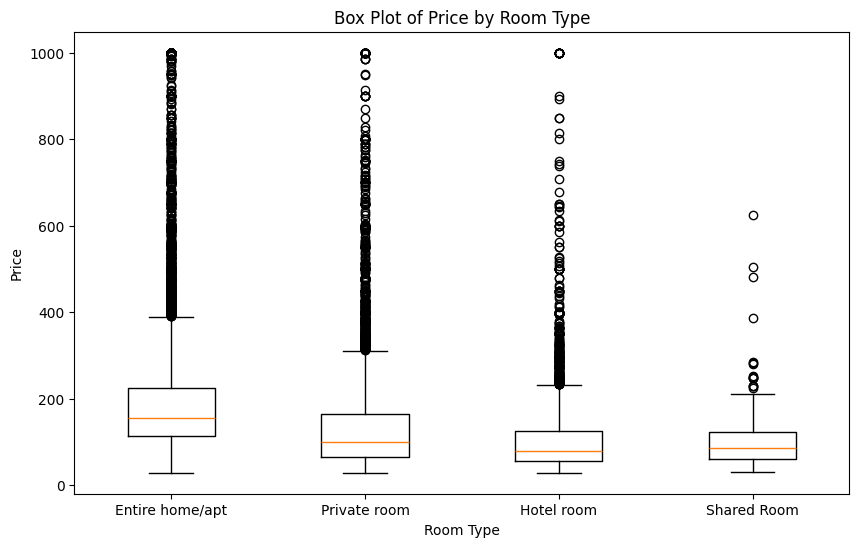

In [26]:
# Accessing the price column for each neighborhood group 
entire_arr_box = entire['price']
private_arr_box = brook['price']
hotel_arr_box = queens['price']
shared_arr_box = staten['price']

# Creating a list that contains the price data for each neighborhood for plotting
room_to_plot = [entire_arr_box, private_arr_box, hotel_arr_box, shared_arr_box]

# Creating boxplot incoming...
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.boxplot(room_to_plot)
ax.set_xticklabels(['Entire home/apt', 'Private room', 'Hotel room', 'Shared Room'])
plt.title('Box Plot of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

It's helpful to look at pricing differences with statistics. This helps confirm what we see and gives us a better understanding of the data:

In [27]:
# Accessing the 'price' column's descriptive statistics
entire_arr_box = man['price']
entire_arr = man['price'].describe()
private_arr = brook['price'].describe()
hotel_arr = queens['price'].describe()
shared_arr = staten['price'].describe()

# Creating a dictionary to store the descriptive statistics for each room type
room_data = {
    'Entire home/apt': entire_arr,
    'Private room': private_arr,
    'Hotel room': hotel_arr,
    'Shared Room': shared_arr,
}

# Converting the dictionary into a DataFrame for better readability
room_df_summary = pd.DataFrame(room_data)
room_df_summary

,Entire home/apt,Private room,Hotel room,Shared Room
count,11639.000000,11258.000000,4003.000000,284.000000
mean,193.930578,134.988009,108.664751,102.767606
std,166.528395,116.636417,98.815595,70.368155
min,29.000000,29.000000,29.000000,31.000000
25%,97.000000,65.000000,55.000000,60.000000
50%,150.000000,100.000000,80.000000,87.000000
75%,225.000000,164.000000,126.000000,122.000000
max,1000.000000,1000.000000,1000.000000,625.000000


In [28]:
room_df = df[['room_type']]
encoded_room_df = pd.get_dummies(room_df, columns=['room_type'], prefix = 'room', drop_first = True)

# Adding the encoding columns to our feature/label data set
data = pd.concat([data, encoded_room_df], axis=1)
data.dropna(inplace = True)

Now lets see the encoded columns!

In [29]:
print(data.columns)
data

Index(['beds', 'bedrooms', 'accommodates', 'bathrooms', 'total_rooms', 'price',
       'location_Brooklyn', 'location_Manhattan', 'location_Queens',
       'location_Staten Island', 'room_Hotel room', 'room_Private room',
       'room_Shared room'],
      dtype='object')


,beds,bedrooms,accommodates,bathrooms,total_rooms,price,location_Brooklyn,location_Manhattan,location_Queens,location_Staten Island,room_Hotel room,room_Private room,room_Shared room
1,1.386294,0.693147,1.386294,0.693147,1.098612,4.330733,True,False,False,False,False,False,False
2,1.098612,1.098612,1.609438,0.916291,1.504077,5.620401,True,False,False,False,False,False,False
3,0.693147,0.693147,1.098612,0.693147,1.098612,4.234107,False,True,False,False,False,True,False
4,0.693147,0.693147,0.693147,0.693147,1.098612,4.330733,False,True,False,False,False,True,False
7,0.693147,0.693147,0.693147,0.693147,1.098612,4.143135,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,0.693147,0.693147,1.098612,0.693147,1.098612,4.499810,False,False,True,False,False,True,False
28018,1.098612,1.098612,1.945910,0.693147,1.386294,6.908755,True,False,False,False,False,False,False
28019,0.693147,0.693147,1.098612,1.098612,1.386294,4.174387,True,False,False,False,False,True,False
28020,1.098612,0.693147,1.386294,0.693147,1.098612,4.442651,True,False,False,False,False,False,False


### Building Our Models
**Now that we've completed our EDA and prepared our features, it's time to train and test our model!**

Now that we have our dataset named ```data``` with all the features we explored, we need to split it into features and the label for training our model. In this context, ```X``` will represent the features, which include all the relevant data points we want our model to learn from (such as room types, neighborhood groups, and any other characteristics). On the other hand, ```y``` will represent the label, which is the target variable we’re predicting—specifically: price of the Airbnb listings.

In [30]:
features = data.drop(columns=['price']).columns.tolist()
X = data[features]
y = data['price']

# Checking the shape to see we have all the same examples, correct # of features, and only one column for y
print(X.shape)
print(y.shape)

(24000, 12)
(24000,)


In this code, we are using the ```train_test_split``` function to divide our dataset into training and testing sets. The variables ```X_train``` and ```y_train``` will be used to train our model, while ```X_test``` and ```y_test``` will be reserved for evaluating its performance.

I chose to set the test size to 0.2 so that 20% of the dataset will be allocated for testing. I chose this value since it's a common practice between having data to train the model effectively while having  data to evaluate the model’s performance.

I selected a random state of 42 out of pure randomness. However, setting up a random state guarantees that every time the code is run, we will get the same split of the data into training and testing sets.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Model A: Linear Regression

First, I’m testing with linear regression because all features seem to have a clear linear relationship with the label price. We used correlation to identify relationships with the numerical values, and the variations in different locations pretty clearly indicate higher or lower average prices. 

In [32]:
# Create the  LinearRegression model object 
model = LinearRegression()

# Fit the model to the training data 
model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = model.predict(X_test)

In [33]:
print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , model.intercept_)

# Print weights
print('\nWeights:')
i = 0
for w in model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', features[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  4.005124784027428

Weights:
w_ 1 =  -0.020335357966168578  [ weight of  beds ]
w_ 2 =  1.3643318204981294  [ weight of  bedrooms ]
w_ 3 =  0.521550349995164  [ weight of  accommodates ]
w_ 4 =  1.127372601146055  [ weight of  bathrooms ]
w_ 5 =  -1.5600142827853718  [ weight of  total_rooms ]
w_ 6 =  0.1716547479907674  [ weight of  location_Brooklyn ]
w_ 7 =  0.502843849493416  [ weight of  location_Manhattan ]
w_ 8 =  0.049259553940115566  [ weight of  location_Queens ]
w_ 9 =  -0.020632651839395114  [ weight of  location_Staten Island ]
w_ 10 =  0.7239463531549913  [ weight of  room_Hotel room ]
w_ 11 =  -0.4777772579934012  [ weight of  room_Private room ]
w_ 12 =  -0.6250899996302178  [ weight of  room_Shared room ]


In [34]:
# Print mean squared error
print('\nModel Performance\n\nRMSE =   %.2f'
      % np.sqrt(mean_squared_error(y_test, prediction)))
# The coefficient of determination: 1 is perfect prediction
print(' R^2 =   %.2f'
      % r2_score(y_test, prediction))


Model Performance

RMSE =   0.46
 R^2 =   0.56


**Let's analyze what just happened.**

The **weights** from our linear regression model show how much each feature affects the predicted price. Basically, each weight tells us how much the price is expected to change if that feature increases by one unit while keeping everything else the same. For example, the weight for bedrooms is positive, which means that having more bedrooms usually bumps up the price. On the other hand, the weight for beds is negative, suggesting that adding more beds doesn’t always lead to a higher price, and it might point to a different pricing trend.

The **intercept** or alpha is what the model predicts the price would be when all the features are zero. In this case, our intercept is about 4.01, but doesn’t make much sense practically since a listing can’t have zero features. Still, it gives us a baseline to understand how the features contribute to the overall prediction.

The **RMSE** (Root Mean Squared Error) tells us how good our model is at predicting the test data. With an RMSE of 0.46, this means that, on average, our predictions are off by about 0.46 units from the actual prices. A lower RMSE is better because it means our predictions are pretty close to the real prices.

Finally, the **R-squared** (R²) value of 0.56 shows how much of the price variation can be explained by our features. So, an R² of 0.56 means we’re explaining around 56% of the price differences with the features we have. While that sounds decent, it also suggests that there might be other things affecting the price that we didn’t include in our model. 

#### Model B: Gradient Boosting

In this code, I’m using a Gradient Boosting Regressor to see if I can make better predictions for the price of listings and develop a deeper understand of how Gradient Boosting works around my data.

In [35]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Optimized Gradient Boosting Mean Squared Error: {mse}')
print(f'Optimized Gradient Boosting Root Mean Squared Error: {rmse}')
print(f'Optimized Gradient Boosting R-squared: {r2}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 300}
Optimized Gradient Boosting Mean Squared Error: 0.1978430684220235
Optimized Gradient Boosting Root Mean Squared Error: 0.4447955355239343
Optimized Gradient Boosting R-squared: 0.5830314604648408


**A Quick Gradient Boosting with Grid Search Debrief:**
First, I set up a parameter grid that includes various settings like the number of trees (n_estimators), learning rate, maximum depth, and minimum samples required to split a node. By testing combinations, the best configuration for my model should be discovered.

Next, I initialize the Gradient Boosting model and prepare for Grid Search, which efficiently tests all combinations in the parameter grid using 5-fold cross-validation. Setting ```n_jobs=-1``` uses all available cores, and ```verbose=2``` helps me track progress. I use negative mean squared error as the scoring metric to minimize error.

After fitting the grid search with my training data, the best parameters I found were a learning rate of **0.1**, max depth of **3**, minimum samples split of **5**, and **300** estimators. This mix ensures:
* Flexibility: A max depth of **3** captures important patterns without being too complex, and **300** estimators help the model learn complex relationships effectively.
* Minimum Samples Split of **5**: This limits splits to cases with enough samples, preventing overfitting.

Finally, I used the best model to make predictions on my test data, calculating the mean squared error (MSE) at **0.20**, the root mean squared error (RMSE) at **0.45**, and an R-squared (R²) value of **0.58**, showing that 58% of price variation is explained by the features. Overall, this process has helped me identify the best model settings, putting me on track for accurate predictions!

#### Model C: Random forest

Lastly, I’m trying out Random Forest Regressor to see if I can make better predictions for the price of listings and develop a deeper understand of how Random Forests work around my data. :')

In [36]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = [{'n_estimators': [250,500,1000]}, {'min_samples_leaf': [2,3,5]}]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring = 'neg_mean_squared_error')

grid_search.fit(X_train, y_train.values.ravel())
grid_search.best_params_
grid_search.best_estimator_

print(grid_search)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Optimized Decision Tree Mean Squared Error: {mse}')
print(f'Optimized Decision Tree Root Mean Squared Error: {rmse}')
print(f'Optimized Decision Tree R-squared: {r2}')

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [250, 500, 1000]},
                         {'min_samples_leaf': [2, 3, 5]}],
             scoring='neg_mean_squared_error')
Best Parameters: {'min_samples_leaf': 5}
Optimized Decision Tree Mean Squared Error: 0.19818855850582737
Optimized Decision Tree Root Mean Squared Error: 0.4451837356708209
Optimized Decision Tree R-squared: 0.5823033151888067


**An Overview of Random Forest with Grid Search:** In this code, I'm using **GridSearchCV** to fine-tune a **Random Forest Regressor**. I set up a parameter grid to test different values for ```n_estimators``` (the number of trees) and ```min_samples_leaf``` (the minimum number of samples required to be at a leaf node). This helps find the best combination for my model.

I initialized the Random Forest model and conducted a grid search with **5-fold cross-validation** to evaluate the model's performance while testing different parameter combinations. The scoring metric used is **negative mean squared error**, which helps me minimize error.

After running the grid search, I checked the best parameters, which turned out to be **min_samples_leaf = 5**. Then, I used this optimized model to make predictions on the test set.

Finally, I evaluated the model's performance using mean squared error (MSE), root mean squared error (RMSE), and R-squared (R²) values. The results showed an MSE of about **0.20**, RMSE of **0.45**, and an R² of around **0.58**, indicating that this model also explains about 58% of the price variation based on the features.

Overall, this process helped me identify the best settings for my Random Forest model, getting me closer to making accurate price predictions!

### Model Performance Analysis
In my analysis, I looked at how different regression models performed, including Linear Regression, Random Forest, and Gradient Boosting. I found that both Random Forest and Gradient Boosting did really well and had similar results, while Linear Regression was just a bit behind, being off by about 0.2.

I think the Random Forest and Gradient Boosting models performed the same because they both did a great job capturing the complex relationships in the data. They’re good at handling non-linear patterns, which is crucial since pricing in real estate can be influenced by so many factors. On the other hand, Linear Regression relies on the assumption that everything is linear. While it was only slightly off, it's clear that it might miss out on some important trends compared to the other two.

Looking ahead, there are definitely ways I could improve these models. For instance, I could try different settings for the hyperparameters in both Random Forest and Gradient Boosting. Playing around with the learning rate, tree depth, and number of estimators could lead to better performance. 

I'm also excitedly confident that there's room to enhance the models by adding more relevant features. By including categorical variables, like room type and neighborhood, I could give the models more information to work with, which might help capture the pricing dynamics better. If given more time to work on this project, I could spend more time on EDA and NLP on the object data types.

Another area for improvement is in data cleaning and preprocessing. Ensuring there are no outliers and filling in any missing values could really make a difference in how the models perform. Since this is so important, I need to make sure to clean the data thoroughly before fitting any model.

Overall, I feel like I’m on the right track. With these improvements, I can work towards achieving a higher R-squared value and making even more accurate predictions for pricing! 


### Improving Our Performance with Additional Feature 'amenities'
**To improve my results, I'll be analyzing ```'amenities'```. Beginning with EDA, then feature engineering, then adding it to the best model!**

One of the main reasons I wanted to explore this dataset is the opportunity to analyze values that require preprocessing text to gain deeper insights into pricing for listings! While features like the description and name of the listings could also provide useful information, they tend to be more subjective. Instead, I chose to focus on the more objective data found in the ```amenities```.

Different amenities can significantly influence rental prices, with certain features leading to higher costs. My goal is to explore which amenities are most common and, among those, which ones are associated with higher prices. Understanding this can help identify deeper patterns in how amenities impact pricing. After all, if we want to figure out what influences price, looking at common amenities linked to higher prices could give us valuable insights into the market.

Let's peak at how the amenities are displayed:

In [32]:
df['amenities'].head(5)

0    ["Extra pillows and blankets", "Baking sheet",...
1    ["Extra pillows and blankets", "Luggage dropof...
2    ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
3    ["Room-darkening shades", "Lock on bedroom doo...
4    ["Breakfast", "Carbon monoxide alarm", "Fire e...
Name: amenities, dtype: object

*Zooming into the 1010th example (Because you're a ten out of ten!):*

In [33]:
df['amenities'].iloc[1010]

'["Baking sheet", "Wine glasses", "Toaster", "First aid kit", "Hangers", "Ceiling fan", "Long term stays allowed", "Carbon monoxide alarm", "Washer", "Cleaning products", "Wifi", "Heating", "Dishes and silverware", "Dryer", "Host greets you", "Air conditioning", "Free street parking", "Essentials", "Hot water", "Kitchen", "Cooking basics", "Dedicated workspace", "Hair dryer", "Stove", "Smoke alarm", "Iron", "Oven", "Elevator", "Refrigerator", "Coffee maker"]'

As you can tell, there’s a huge variety of amenities in the list. With over 20,000 examples, it can be challenging to identify patterns when everyone names things differently, with varying punctuation and phrasing such as "street parking" versus "baking sheet." As a result, we need to preprocess these lists using a natural language toolkit.

1. We’ll tokenize the words! I’ll split the amenities based on commas, as that’s what separates the items!
2. Next, we'll use the NLTK library to process the text further. I’ll remove common stop words like "the" and "has," though I think this might not be as critical since these are just names of items. I feel this may not be a huge deal since we’re just dealing with names of items. However, given that there are thousands of examples and a wide variety of different amenities, it’s better to be cautious and do this to ensure our analysis is as clean as possible. 

In [71]:
# Initialize necessary tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Preprocessing function using nltk
# This function will help clean and standardize the amenities data.
def preprocess_amenities(amenities):
    # Tokenize the amenities list (split on spaces and punctuation)
    tokens = word_tokenize(amenities.lower())
    
    # Remove stop words and non-alphabetic tokens
    filtered_tokens = [word for word in tokens if word.isalpha() and word not in stop_words]
    
    # Lemmatize the words
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    
    return lemmatized_tokens

# Apply preprocessing to the amenities column
df['processed_amenities'] = df['amenities'].apply(preprocess_amenities)

# Initialize a Counter to keep track of amenity counts
amenity_counter = Counter()

# Iterate over each row in the 'processed_amenities' column
for amenities_list in df['processed_amenities']:
    # Update the counter with the amenities from this row
    amenity_counter.update(amenities_list)

# Convert the counter to a dictionary
amenities_dict = dict(amenity_counter)
print("Amenities dictionary length: " + str(len(amenities_dict)))

Amenities dictionar length: 1008


[('alarm', 46942),
 ('allowed', 31510),
 ('dryer', 30066),
 ('wifi', 28054),
 ('heating', 26635),
 ('essential', 26116),
 ('tv', 25875),
 ('long', 25370),
 ('term', 25370),
 ('stay', 25370),
 ('smoke', 25319),
 ('kitchen', 24873),
 ('air', 24217),
 ('conditioning', 24213),
 ('hot', 23011),
 ('water', 22173),
 ('hanger', 22049),
 ('carbon', 21623),
 ('monoxide', 21623),
 ('parking', 20200),
 ('hair', 19529),
 ('shampoo', 19093),
 ('iron', 19032),
 ('dedicated', 19005),
 ('workspace', 19005),
 ('free', 16763),
 ('dish', 15764),
 ('silverware', 15764),
 ('refrigerator', 15463),
 ('basic', 14739),
 ('cooking', 14738),
 ('coffee', 13687),
 ('microwave', 13685),
 ('stove', 13323),
 ('maker', 13198),
 ('street', 13074),
 ('oven', 12710),
 ('fire', 12621),
 ('extinguisher', 12374),
 ('bed', 12196),
 ('linen', 12194),
 ('cable', 12129),
 ('aid', 10980),
 ('kit', 10979),
 ('first', 10975),
 ('washer', 10804),
 ('private', 9123),
 ('extra', 8422),
 ('pillow', 8422),
 ('blanket', 8422),
 ('lock', 

In [35]:
# Let's only print the key-value pairs that have more than 500 values/counts, and sort those pairs from descending order!
sorted_items = sorted(((word, count) for word, count in amenities_dict.items() if count > 500), key=lambda item: item[1], reverse=True)
print("Sorted Amenities Dictionary:")
print(sorted_items)

Sorted Amenities Dictionary:
{'alarm': 46942, 'allowed': 31510, 'dryer': 30066, 'wifi': 28054, 'heating': 26635, 'essential': 26116, 'tv': 25875, 'long': 25370, 'term': 25370, 'stay': 25370, 'smoke': 25319, 'kitchen': 24873, 'air': 24217, 'conditioning': 24213, 'hot': 23011, 'water': 22173, 'hanger': 22049, 'carbon': 21623, 'monoxide': 21623, 'parking': 20200, 'hair': 19529, 'shampoo': 19093, 'iron': 19032, 'dedicated': 19005, 'workspace': 19005, 'free': 16763, 'dish': 15764, 'silverware': 15764, 'refrigerator': 15463, 'basic': 14739, 'cooking': 14738, 'coffee': 13687, 'microwave': 13685, 'stove': 13323, 'maker': 13198, 'street': 13074, 'oven': 12710, 'fire': 12621, 'extinguisher': 12374, 'bed': 12196, 'linen': 12194, 'cable': 12129, 'aid': 10980, 'kit': 10979, 'first': 10975, 'washer': 10804, 'private': 9123, 'extra': 8422, 'pillow': 8422, 'blanket': 8422, 'lock': 8030, 'entrance': 7451, 'premise': 7325, 'door': 7170, 'bedroom': 7169, 'elevator': 6386, 'luggage': 6140, 'dropoff': 6140

Now, I’m counting how many times each amenity appears in the dataset, which will help identify the most common features across listings.
Next, I’ll check the average prices for listings with certain amenities. Here’s the list of amenities I want to investigate:

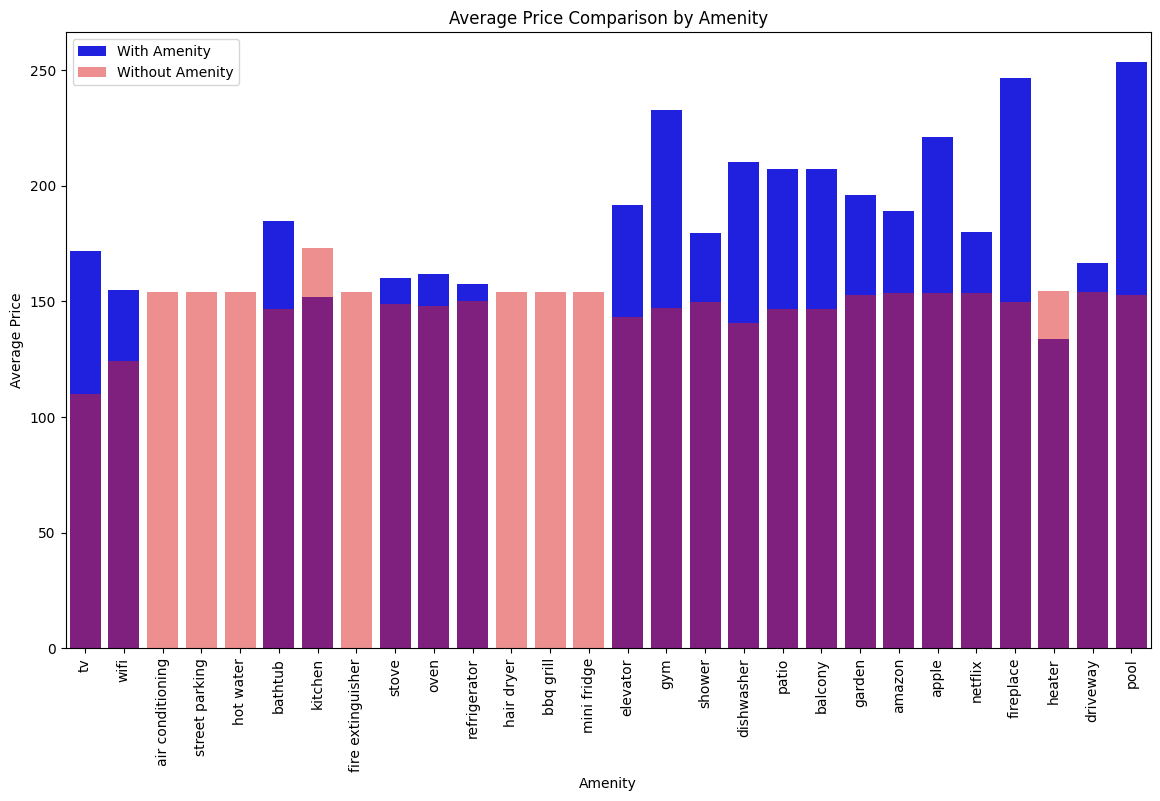

In [36]:
# List of amenities to check
amenities_to_check = [
    'tv', 'wifi', 'air conditioning', 'street parking', 'hot water',
    'bathtub', 'kitchen', 'fire extinguisher', 'stove', 'oven',
    'refrigerator', 'hair dryer', 'bbq grill', 'mini fridge', 'elevator',
    'gym', 'shower', 'dishwasher', 'patio', 'balcony', 'garden',
    'amazon', 'apple', 'netflix', 'fireplace', 'heater', 'driveway', 'pool'
]

# Create boolean columns for each amenity
for amenity in amenities_to_check:
    df[amenity] = df['processed_amenities'].apply(lambda x: amenity in x)

# Create a dictionary to store the average prices
amenity_price_comparison = {}

# Calculate the average price for listings with and without each amenity
for amenity in amenities_to_check:
    with_amenity = df[df[amenity] == True]['price'].mean()
    without_amenity = df[df[amenity] == False]['price'].mean()
    amenity_price_comparison[amenity] = {'with': with_amenity, 'without': without_amenity}

# Convert to DataFrame for easier visualization
amenity_price_comparison_df = pd.DataFrame(amenity_price_comparison).T
amenity_price_comparison_df.reset_index(inplace=True)
amenity_price_comparison_df.columns = ['Amenity', 'Price with Amenity', 'Price without Amenity']

# Plotting
plt.figure(figsize=(14, 8))
sns.barplot(data=amenity_price_comparison_df, x='Amenity', y='Price with Amenity', color='blue', label='With Amenity')
sns.barplot(data=amenity_price_comparison_df, x='Amenity', y='Price without Amenity', color='red', label='Without Amenity', alpha=0.5)
plt.xticks(rotation=90)
plt.ylabel('Average Price')
plt.title('Average Price Comparison by Amenity')
plt.legend()
plt.show()

**Comparing the Price by Amenity**:

The bar chart shows the average price of listings with and without various amenities. 

1. **TV**:
   - Listings with a TV have a higher average price compared to those without.
   
2. **WiFi**:
   - The average price for listings with WiFi is slightly higher than those without.

3. **Air Conditioning**:
   - Similar average prices for listings with and without air conditioning.

4. **Street Parking**:
   - Slightly higher average prices for listings with street parking.

5. **Hot Water**:
   - Similar average prices for listings with and without hot water.

6. **Bathtub**:
   - Higher average prices for listings with a bathtub compared to those without.

7. **Kitchen**:
   - Listings with a kitchen tend to have higher average prices.

8. **Fire Extinguisher**:
   - Similar average prices for listings with and without a fire extinguisher.

9. **Stove**:
   - Slightly higher average prices for listings with a stove.

10. **Oven**:
    - Listings with an oven have higher average prices compared to those without.

11. **Refrigerator**:
    - Higher average prices for listings with a refrigerator.

12. **Hair Dryer**:
    - Listings with a hair dryer have slightly higher average prices.

13. **BBQ Grill**:
    - Higher average prices for listings with a BBQ grill.

14. **Mini Fridge**:
    - Slightly higher average prices for listings with a mini fridge.

15. **Elevator**:
    - Listings with an elevator have higher average prices.

16. **Gym**:
    - Significantly higher average prices for listings with a gym.

17. **Shower**:
    - Similar average prices for listings with and without a shower.

18. **Dishwasher**:
    - Higher average prices for listings with a dishwasher.

19. **Patio**:
    - Listings with a patio have higher average prices.

20. **Balcony**:
    - Higher average prices for listings with a balcony.

21. **Garden**:
    - Listings with a garden have higher average prices.

22. **Amazon**:
    - Slightly higher average prices for listings with Amazon services.

23. **Apple**:
    - Similar average prices for listings with and without Apple services.

24. **Netflix**:
    - Listings with Netflix have higher average prices.

25. **Fireplace**:
    - Higher average prices for listings with a fireplace.

26. **Heater**:
    - Lower average prices for listings with a heater compared to those without.

27. **Driveway**:
    - Listings with a driveway have higher average prices.

28. **Pool**:
    - Listings with a pool have the highest average prices among all amenities.

Now, I’m exploring further into the data and playing around with the amenities to see if we can sum them up in a way that a higher number of amenities correlates with a higher price. The challenge here is that different amenities might carry different levels of importance or influence on pricing. For example, having a gym or a pool likely adds more value than just having a TV. 

Based on the amenities that had higher average prices for listings with them versus without them, our program goes through each example to check if these amenities were in their list of ```amenities``` in the original ```df```. If an amenity was present, a value of +1 is added to the total count of ```amenities``` for that listing in the ```data``` dataframe. I then proceed to analyze the correlation between the average price and the number of amenities. As I continued to explore and experiment with my list, I discovered that the highest correlation was achieved with the features listed below! As a result, I removed amenities ```bathtub```, ```kitchen```, ```stove```, ```oven```, ```refrigerator```, ```shower```, ```patio```, ```garden```, ```amazon```, and ```netflix```.


In [42]:
# List of amenities to check
amenities_list = ['tv', 'wifi',  'elevator', 'gym', 'dishwasher', 'balcony', 'apple', 'fireplace', 'pool']

# Function to count the number of amenities present in processed amenities
def count_amenities(processed_amenities):
    return sum(amenity in processed_amenities for amenity in amenities_list)

# Apply the function to the 'processed_amenities' column
data['amenity_count'] = df['processed_amenities'].apply(count_amenities)

# Analyze the correlation between average price and number of amenities
correlation = data[['price', 'amenity_count']].corr().iloc[0, 1]
print("Correlation between price and number of amenities:", correlation)

Correlation between price and number of amenities: 0.3938627631419172


Now, I'm grouping the listings by the total number of amenities they offer and then calculating the average price for each group. The goal is to observe how the number of amenities impacts pricing. After computing these average prices, I visualize the relationship between the number of amenities and the average price using a scatter plot. This helps to illustrate whether there is a trend or pattern in how prices increase with the number of amenities. To measure the strength of this relationship, I take the correlation between the number of amenities and the price. *Let's see what happens!*

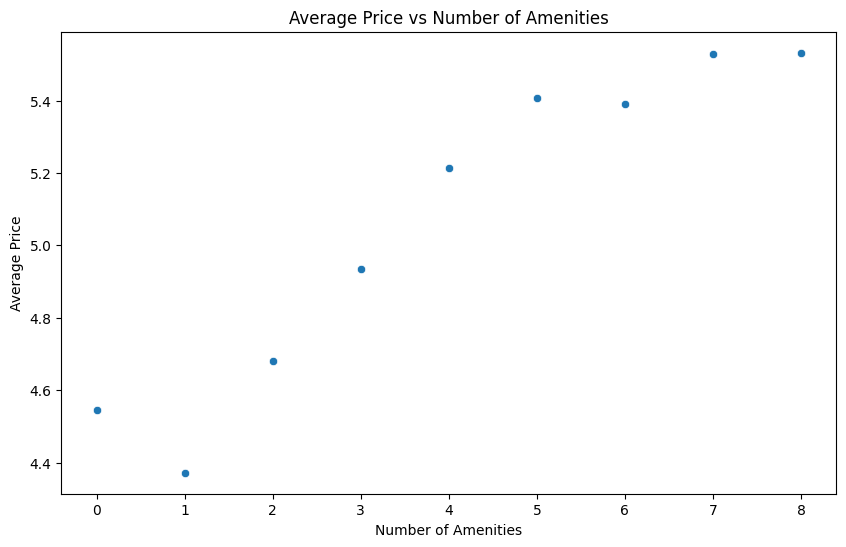

Correlation between number of amenities and price: 0.39386276314191737


In [43]:
# Group by the number of amenities and compute the average price
average_price_by_amenities = data.groupby('amenity_count')['price'].mean().reset_index()

# Plot the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=average_price_by_amenities, x='amenity_count', y='price')
plt.xlabel('Number of Amenities')
plt.ylabel('Average Price')
plt.title('Average Price vs Number of Amenities')
plt.show()

# Compute correlation
correlation = data[['amenity_count', 'price']].corr().loc['amenity_count', 'price']
print(f'Correlation between number of amenities and price: {correlation}')

After experimenting, I found that the highest correlation between the number of amenities and price was 0.39, which is a slightly positive correlation. 

**While we've already gained valuable insights into how different amenities influence the pricing of Airbnb listings, the next step is to test whether incorporating the number of amenities as a feature could enhance the performance of our predictive model.** 

In [55]:
# First, transform the data
data['amenity_count'] = np.log(data['amenity_count'] + 1) 
data['amenity_count'].head()

1    0.741276
2    0.741276
3    0.741276
4    0.741276
7    0.526589
Name: amenity_count, dtype: float64

In [60]:
# list all features
features = data.columns.tolist()

# Create the dataset with features
X = data[features].drop(columns = 'price')

# Create the dateaset with the label
y = data['price']

# Check that there are 13 features
print("Number of features: " + str(X.shape[1]))

Number of features: 13


In [61]:
# Ensure there are no null values
data.isnull().sum()

beds                      0
bedrooms                  0
accommodates              0
bathrooms                 0
total_rooms               0
price                     0
location_Brooklyn         0
location_Manhattan        0
location_Queens           0
location_Staten Island    0
room_Hotel room           0
room_Private room         0
room_Shared room          0
amenity_count             0
dtype: int64

In [62]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Initialize the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(random_state=42)

# Set up Grid Search
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit Grid Search
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

# Get the best model
best_model = grid_search.best_estimator_


# Predict with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Optimized Gradient Boosting Mean Squared Error: {mse}')
print(f'Optimized Gradient Boosting Root Mean Squared Error: {rmse}')
print(f'Optimized Gradient Boosting R-squared: {r2}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
Optimized Gradient Boosting Mean Squared Error: 0.1874532178868488
Optimized Gradient Boosting Root Mean Squared Error: 0.43295867919103875
Optimized Gradient Boosting R-squared: 0.6049288200144773


After establishing the best model, I predicted outcomes on my test dataset and assessed its performance. The evaluation yielded an R-squared (R²) value of **0.60**. This means that approximately 60.49% of the variance in the listing prices can be explained by the selected features (such as amenities and their counts). Overall, this process increased the accuracy of my predictions on price evaluation! However, the R² value suggests that there are additional factors affecting price that are not captured by the model.

### My Reflection 
Reflecting on this machine learning project, I realize that I could enhance my approach by exploring a more unique set of features identified through thorough data exploration and feature engineering. Spending additional time on feature discovery might uncover new insights and interactions between features. I also see room for improvement in data preparation, such as using better methods for handling outliers and scaling features. Removing examples with null values might not have been the best approach.

This project has been incredibly exciting and motivating for me as a beginner in machine learning. Going through the different phases of the machine learning life cycle—from defining the problem and preparing the data to building and evaluating models—has given me invaluable hands-on experience.

Each step has deepened my understanding of how machine learning models are developed and optimized. The process of exploring data, trying out different models, and refining techniques has not only improved my technical skills but also increased my enthusiasm for learning more about ML. The challenges and discoveries throughout this project have reinforced my passion for the field and inspired me to continue exploring and growing in machine learning. I’m excited to apply these learnings to future projects!